In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt


In [378]:

# Funcion que genera un techo a partir de un ancho y alto
def generar_techo(width: int, height: int, ):
    # 0 significa un espacio desocupado
    return np.zeros((width,height))


# Funcion que intenta colocar en el techo dado un panel en cierta posición
# si pudo colocar el panel con exito devuelve el techo con el panel puesto
# de lo contrario eleva un error
def colocar_panel(techo : np.ndarray, panel_width, panel_height, start_x = 0, start_y = 0, panel_ind=0) :
    tmp = techo.copy()

    for i in range(panel_width):
        for j in range(panel_height):
            
            # si el valor en el espacio es distinto de 0 entonces la celda esta ocupada
            if tmp[start_x + i,start_y + j] >= 1:
                raise Exception

            # de lo contrario coloca un panel definiendo la celda como un numero mayor que 0
            tmp[start_x + i,start_y + j] = 1 + panel_ind
            
    return tmp

# Funcion para calcular la cantidad de paneles que caben dado el tamaño del techo y del panel
def calculate_panels(panel_width: int, panel_height: int, 
                    roof_width: int, roof_height: int) -> int:
    
    # Genero un techo
    techo = generar_techo(roof_width,roof_height)
    n = 0

    # Itero sobre todas las celdas en el techo via indice i j
    for i in range(roof_width):
        for j in range(roof_height):

            # Intento colocar el panel en la posicion
            try:
                # De ser exitoso, actualiza el techo con el panel y avanza a la siguiente celda
                techo = colocar_panel(techo, panel_width, panel_height,  i*panel_width, j*panel_height, n)
                n+=1
            except:
                # si no logra colocar el panel, intenta colocarlo rotado 90 grados
                try:
                    # De ser exitoso, actualiza el techo con el panel y avanza a la siguiente celda
                    techo = colocar_panel(techo, panel_height, panel_width,  i*panel_width, j*panel_height, n)
                    n += 1
                except:
                    # Si no cabe en ningun sentido entonces el panel no es colocado
                    pass
            


    return n

r1 = calculate_panels(1,2,2,4)
r2 = calculate_panels(1,2,3,5)
r3 = calculate_panels(2,2,1,10)
r4 = calculate_panels(2,4,6,3)


print( r1, r2, r3, r4)

4 7 0 1


In [389]:
#Lo único que cambia en este caso es como definimos el valor de las celdas
#pero el proceso es el mismo


# Funcion para generar techo desde una imagen
# Devuelve un array de igual dimension  y con valores correspondientes a 
# -1 si el espacio no es valdo
# 0 si el espacio esta libre
def generar_techo_from_img(path:str):
    img_array = plt.imread(path)
    img_array = img_array
    techo = []
    for fila in img_array:
        tmp = []
        for col in fila:
            
            # aqui cada col es un array con valores [r,g,b,a]
            # como solo trabajo con negro y blanco entonces me quedo con el primer canal
            if col[0] == 0:
                # -1 para las celdas que NO son techo
                tmp.append(-1)
            else:
                # 0 para las celdas que si son techo
                tmp.append(0)
        techo.append(tmp)   
    
    techo = np.array(techo)
    return techo

# Funcion para colocar el panel
def colocar(techo : np.ndarray, panel_width, panel_height, start_x = 0, start_y = 0, panel_ind=0) :
    tmp = techo.copy()
    for i in range(panel_width):
        for j in range(panel_height):

            # el algoritmo es igual, solo que ahora consideramos que 0 es el valor valido
            if tmp[start_x + i,start_y + j] == 0 :
                tmp[start_x + i,start_y + j]  = panel_ind +1
            else:
                raise Exception()
            
    return tmp

def calcular(panel_width,panel_height, roof_img : np.ndarray):
    roof = generar_techo_from_img(roof_img)
    n = 0
    techo = roof.copy()
    roof_width = roof.shape[0]
    roof_height = roof.shape[1]
    for i in range(roof_width):
        for j in range(roof_height):
            try:
                roof =colocar(roof, panel_width, panel_height,  i, j, n)
                n+=1
            except:
                try:
                    roof = colocar(roof, panel_height, panel_width,  i, j, n)
                    n += 1
                except:
                    continue
                
                   
            


    return n, roof
techo = generar_techo_from_img('roof_1.png')
print(techo)

[[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1]
 [-1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1]
 [-1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1]
 [-1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1]
 [-1 -1  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

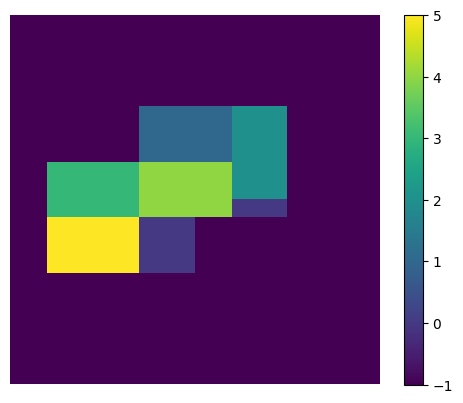

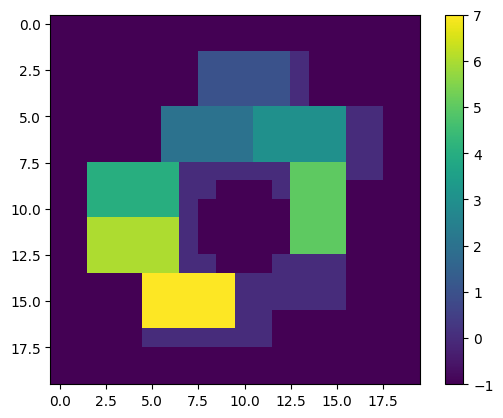

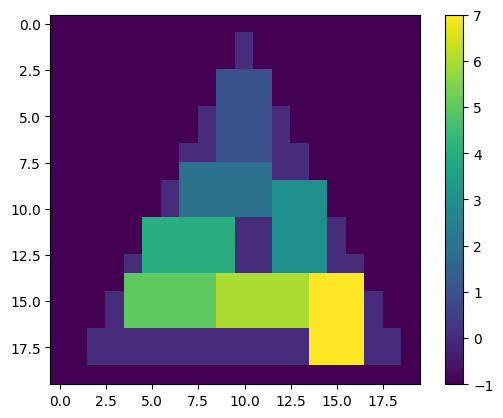

In [ ]:
techo1 = generar_techo_from_img()
techo2 = generar_techo_from_img('roof_2.png')
techo3 = generar_techo_from_img('roof_3.png')


#print(techo)

n1, techo1 = calcular(3,5,'roof_1.png')
n2, techo2 = calcular(3,5,'roof_2.png')
n3, techo3 = calcular(3,5,'roof_3.png')
plt.axis('off')

plt.imshow(techo1)
plt.colorbar()
plt.show()
plt.imshow(techo2)
plt.colorbar()
plt.show()
plt.imshow(techo3)
plt.colorbar()
plt.show()
